In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Data Preprocessing

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras

#### FASHION-MNIST

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
indices = np.random.choice(range(X_train.shape[0]), 10000)

In [5]:
X_train = X_train[indices]
y_train = y_train[indices]

In [6]:
num_classes = 10
input_shape = (28, 28, 1)
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
def my_flatten(x):
    a = []
    for xi in x:
        a.append(xi.flatten())
    return np.array(a)

In [8]:
# flatten x_train, x_test
X_train = my_flatten(X_train)
X_test = my_flatten(X_test)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [11]:
display(X_train.head()), display(y_train.head())

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.017323,-0.026594,-0.052991,-0.048243,-0.064608,-0.074513,-0.096882,-0.155911,-0.23647,-0.379834,...,-0.605441,-0.479139,-0.40161,-0.413380,-0.445795,-0.396079,-0.284279,-0.152415,-0.086772,-0.022884
1,-0.017323,-0.026594,-0.052991,-0.048243,-0.064608,-0.074513,-0.096882,-0.155911,-0.23647,-0.379834,...,-0.605441,-0.479139,-0.40161,-0.413380,-0.445795,-0.396079,-0.284279,-0.152415,-0.086772,-0.022884
2,-0.017323,-0.026594,-0.052991,-0.048243,-0.064608,-0.074513,-0.096882,-0.155911,-0.23647,-0.379834,...,-0.605441,-0.479139,-0.40161,-0.413380,-0.445795,-0.396079,-0.284279,-0.152415,-0.086772,-0.022884
3,-0.017323,-0.026594,-0.052991,-0.048243,-0.064608,-0.074513,-0.096882,-0.155911,-0.23647,-0.379834,...,-0.605441,-0.479139,-0.40161,-0.413380,-0.445795,-0.396079,-0.284279,-0.152415,-0.086772,-0.022884
4,-0.017323,-0.026594,-0.052991,-0.048243,-0.064608,-0.074513,-0.096882,-0.155911,-0.23647,0.053426,...,-0.225340,-0.072512,0.11846,-0.107239,-0.445795,-0.373898,-0.284279,-0.152415,-0.086772,-0.022884


,0
0,5
1,7
2,7
3,1
4,0


(None, None)

## t-SNE

In [12]:
from sklearn.manifold import TSNE

In [13]:
def visualize(df):
    plt.figure(figsize=(10,10))
    sb.scatterplot(data=df, hue='class', x='dim1', y='dim2')
    plt.show()

#### 2-D, perplexity=50

In [14]:
tsne = TSNE(n_components=2, perplexity=50)
X_TSNE = pd.DataFrame(tsne.fit_transform(X_train))

C:\Python\3.9\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python\3.9\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [15]:
X_TSNE = X_TSNE.rename(columns={0:'dim1', 1:'dim2'})
Y = y_train.rename(columns={0:'class'})
df_TSNE = pd.concat([X_TSNE, Y], axis=1)

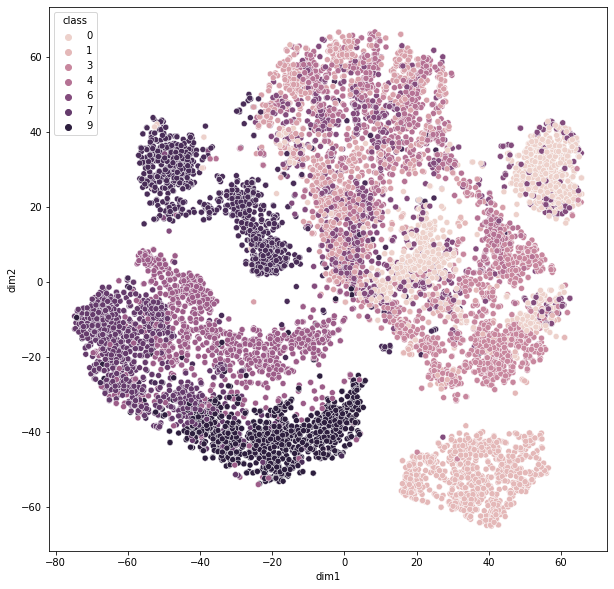

In [16]:
visualize(df_TSNE)

In [17]:
num_neighbors = 50

## PCA

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_train))

In [20]:
X_pca = X_pca.rename(columns={0:'dim1', 1:'dim2'})
df_pca = pd.concat([X_pca, Y], axis=1)

In [21]:
df_pca.head()

,dim1,dim2,class
0,-17.571333,-2.307045,5
1,-18.304482,5.772361,7
2,-7.752763,16.534138,7
3,2.490767,-16.336807,1
4,-12.497234,-8.681048,0


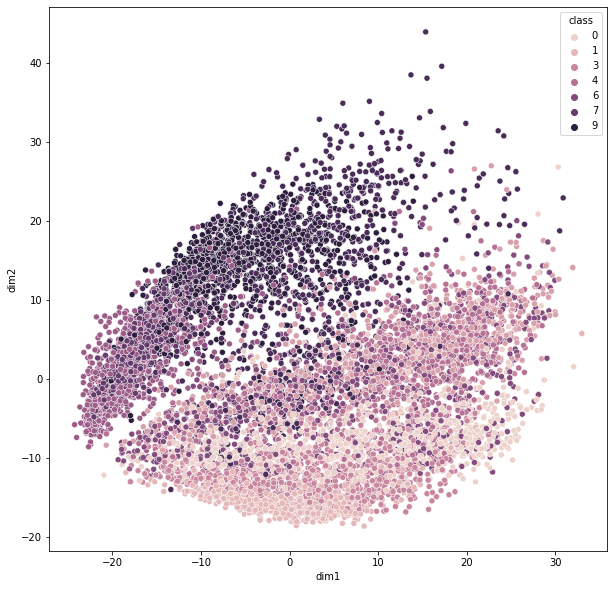

In [22]:
visualize(df_pca)

## SNE

## Sammon Mapping

## Isomap

In [23]:
from sklearn.manifold import Isomap

In [24]:
isomap = Isomap(n_neighbors = num_neighbors, n_components=2)
X_isomap = pd.DataFrame(isomap.fit_transform(X_train))

In [25]:
X_isomap = X_isomap.rename(columns={0:'dim1', 1:'dim2'})
df_isomap = pd.concat([X_isomap, Y], axis=1)

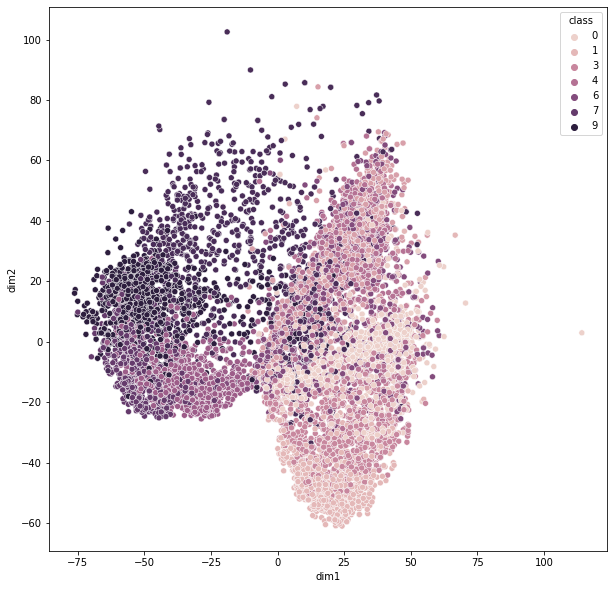

In [26]:
visualize(df_isomap)

## LLE

In [27]:
from sklearn.manifold import LocallyLinearEmbedding

In [28]:
lle = LocallyLinearEmbedding(n_neighbors = num_neighbors, n_components=2)
X_lle = pd.DataFrame(lle.fit_transform(X_train))

In [29]:
X_lle = X_lle.rename(columns={0:'dim1', 1:'dim2'})
df_lle = pd.concat([X_lle, Y], axis=1)

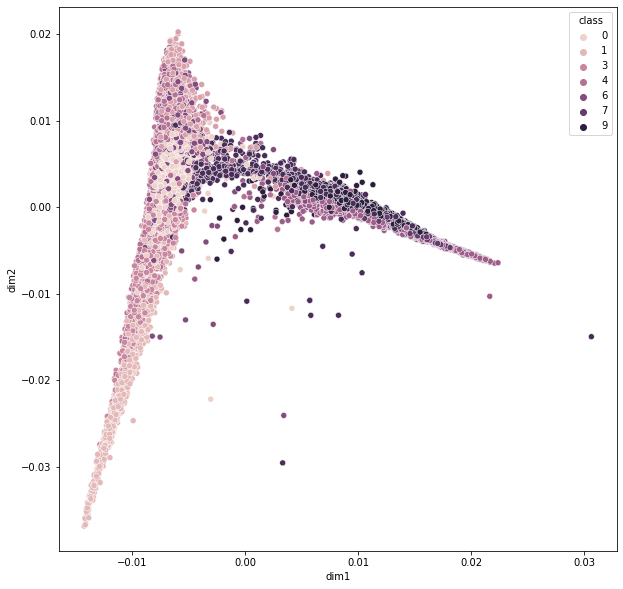

In [30]:
visualize(df_lle)